<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W7D5_ExercisesXP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Exercise 1
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 72.9MB/s]


In [8]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [9]:
import pandas as pd
data_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

In [10]:
data_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
data_diabetes.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
data_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
positive_cases = data_diabetes[data_diabetes['diabetes'] == 1].shape[0]
negative_cases = data_diabetes[data_diabetes['diabetes'] == 0].shape[0]

print("Number of positive cases:", positive_cases)
print("Number of negative cases:", negative_cases)

Number of positive cases: 8500
Number of negative cases: 91500


In [20]:
from sklearn.model_selection import train_test_split

X = data_diabetes.drop('diabetes', axis=1)
y = data_diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 80000
Testing set size: 20000


**Exercise 2**

For a binary classification problem like predicting diabetes (positive or negative), common classification models that can be used include: Logistic Regression, Decision Trees and Random Forest.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

scaler = StandardScaler()

categorical_columns = ['gender', 'smoking_history']
numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X_train_categorical = X_train[categorical_columns]
X_train_numerical = X_train[numerical_columns]

X_test_categorical = X_test[categorical_columns]
X_test_numerical = X_test[numerical_columns]

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

X_train_final = np.concatenate((X_train_encoded.toarray(), X_train_numerical), axis=1)
X_test_final = np.concatenate((X_test_encoded.toarray(), X_test_numerical), axis=1)

X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [24]:
# Exercise 3
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy: 0.959


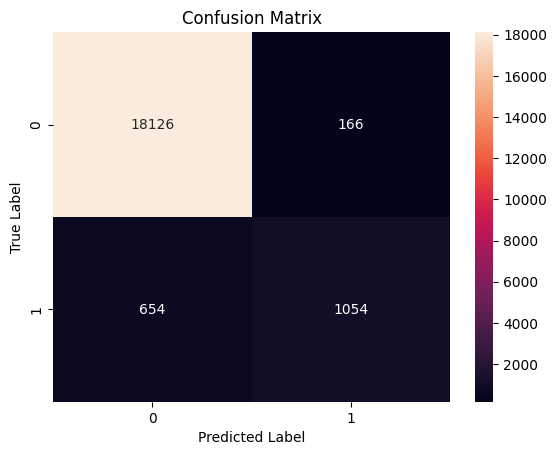

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

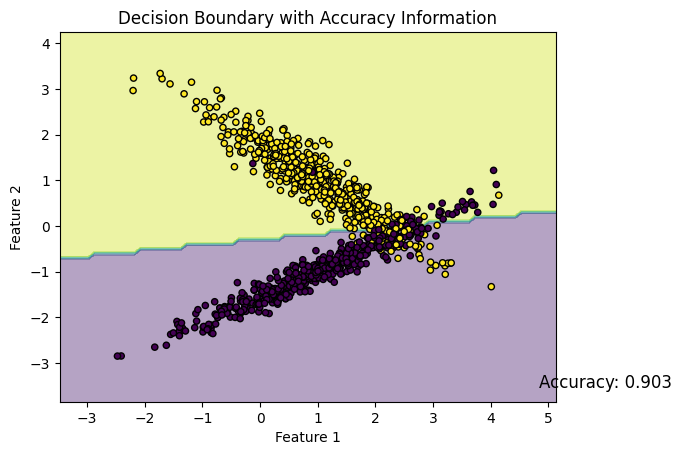

In [48]:
# Exercise 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)


logistic_model = LogisticRegression()
logistic_model.fit(X, y)


y_pred = logistic_model.predict(X)


accuracy = accuracy_score(y, y_pred)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')


plt.text(x_max - 0.3, y_min + 0.3, f'Accuracy: {accuracy:.3f}', fontsize=12)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Accuracy Information')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


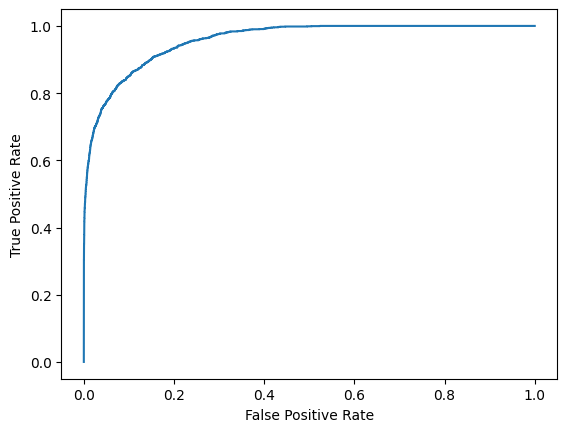

In [45]:
# Exercise 6
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp


categorical_columns = ['gender', 'smoking_history']
numerical_columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X = data_diabetes[['gender', 'smoking_history', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data_diabetes['diabetes']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])


X_train_encoded = sp.csr_matrix(X_train_encoded)
X_test_encoded = sp.csr_matrix(X_test_encoded)

X_train_final = sp.hstack((X_train_encoded, X_train[numerical_columns].values), format='csr')
X_test_final = sp.hstack((X_test_encoded, X_test[numerical_columns].values), format='csr')

log_regression = LogisticRegression()


log_regression.fit(X_train_final, y_train)

y_pred_proba = log_regression.predict_proba(X_test_final)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()